# Proyecto de Análisis de Datos: Encuesta Permanente de Hogares (EPH) - Argentina T1 2024

### **Autor:** Tusiani Sergio
### **Fecha:** 03/07/2025

**Objetivo:** Este proyecto tiene como fin analizar los datos socioeconómicos de la Encuesta Permanente de Hogares de Argentina para el primer trimestre de 2024. Se realizará un análisis exploratorio, se visualizarán los datos para extraer insights sobre educación, empleo e ingresos, y finalmente se construirá un modelo de Machine Learning para predecir la condición de pobreza.

## 0. Configuración del Entorno

En esta primera sección, importaremos las librerías de Python que serán esenciales para nuestro análisis.
* **pandas:** Para la manipulación y análisis de datos tabulares.
* **numpy:** Para operaciones numéricas eficientes.
* **matplotlib** y **seaborn:** Para la creación de visualizaciones (gráficos).
* **scikit-learn:** Para la implementación de nuestro modelo de Machine Learning.

In [53]:
# Importamos las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estili para los gráficos
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8-deep')

# Cargamos el archivo .csv en un DataFrame de pandas
df_eph = pd.read_excel('/content/usu_individual_T124.xlsx')

print("Datos cargados exitosamente")

Datos cargados exitosamente


## 1. Exploración y Limpieza de Datos (EDA)

El objetivo de esta fase es comprender la estructura de nuestros datos, identificar problemas como valores faltantes o columnas irrelevantes, y preparar el dataset para el análisis. La EPH contiene más de 100 variables, por lo que nos enfocaremos en un subconjunto clave.

In [54]:
# Ver las primeras 5 filas para tener una ideal general de los datos
print("Primeras 5 filas del DataFrame:")
print(df_eph.head())

# Obtener información general sobre el DataFrame
print("\nInformación general del DataFrame:")
print(df_eph.info)

Primeras 5 filas del DataFrame:
                          CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  H15  \
0  TQRMNOPUTHLMKQCDEGGFB00852588  2024          1          1           3    1   
1  TQRMNOPUTHLMKQCDEGGFB00852588  2024          1          1           4    1   
2  TQRMNOPUTHLMKQCDEGGFB00852588  2024          1          1           5    0   
3  TQRMNOPPWHLLKRCDEGGFB00852574  2024          1          1           1    1   
4  TQRMNOPPWHLLKRCDEGGFB00852574  2024          1          1           2    1   

   REGION MAS_500  AGLOMERADO  PONDERA  ...  PDECIFR  ADECIFR      IPCF  \
0      42       S          10      439  ...      NaN       12       0.0   
1      42       S          10      439  ...      NaN       12       0.0   
2      42       S          10      439  ...      NaN       12       0.0   
3      42       S          10      675  ...      NaN        8  212500.0   
4      42       S          10      675  ...      NaN        8  212500.0   

   DECCFR  IDECCFR  RDECCFR  G

In [55]:
# Seleccionar un subconjunto de colunmas relevantes para nuestro análisis
columnas_relevantes = [
    'REGION','CH04','CH06','NIVEL_ED','ESTADO',
    'CAT_OCUP', 'P21','PONDERA'
]

df_analisis = df_eph[columnas_relevantes].copy()

# Renombramos columnas para que sean más intuitivas
nombres_nuevos = {
    'REGION': 'Region',
    'CH04': 'Sexo',
    'CH06': 'Edad',
    'NIVEL_ED': 'Nivel_Educativo',
    'ESTADO': 'Estado_Laboral',
    'CAT_OCUP': 'Categoria_Ocupacional',
    'P21': 'Ingreso_Total',
    'PONDERA': 'Ponderador'
}

df_analisis = df_analisis.rename(columns = nombres_nuevos)

print("\nData Frame con columnas seleccionadas y renombradas:")
print(df_analisis.head())


Data Frame con columnas seleccionadas y renombradas:
   Region  Sexo  Edad  Nivel_Educativo  Estado_Laboral  Categoria_Ocupacional  \
0      42     2    44                3               1                      3   
1      42     2    22                5               3                      0   
2      42     2     3                7               4                      0   
3      42     1    54                4               1                      3   
4      42     2    53                4               1                      3   

   Ingreso_Total  Ponderador  
0             -9         439  
1              0         439  
2              0         439  
3         250000         675  
4         200000         675  


### Interpretación del Código
df_eph.head(): Te da una vista previa de cómo están organizados los datos.

df_eph.info(): Es crucial. Te muestra cuántas filas hay, los nombres de todas las columnas, cuántos valores no nulos tiene cada una y el tipo de dato (int64, object, etc.). Esto te ayuda a detectar columnas con muchos datos faltantes.

df_analisis = df_eph[columnas_relevantes].copy(): Creamos un nuevo DataFrame para trabajar de forma más ordenada, seleccionando solo las columnas que nos interesan. Usamos .copy() para evitar advertencias de Python.

df_analisis.rename(): Cambiamos los nombres técnicos (ej: CH04) por nombres descriptivos (ej: sexo) para que el código y los gráficos sean más fáciles de leer.

## Celda de limpieza ⬇

In [56]:
# LA EPH codifica a las personas sin ingreso individual de 0 o -9.
# Vamos a filtrar estos casos para analizar solo a quienes reportaron ingresos.
# También filtraremos a los menores de 14 años, que no suelen estar en el mercado laboral.
df_con_ingreso = df_analisis[(df_analisis['Ingreso_Total'] > 0) &
                             (df_analisis['Edad'] >= 14)].copy()

# Reemplazamos los códigos numéricos de 'sexo' y 'estado_laboral' por etiquetas de texto
df_con_ingreso['Sexo'] = df_con_ingreso['Sexo'].replace({1:'Hombre', 2: 'Mujer'})
df_con_ingreso['Estado_Laboral'] = df_con_ingreso['Estado_Laboral'].replace({1:'Ocupado', 2:'Desocupado', 3:'Inactivo', 4:'Menor de 10'})

# Vemos las estadísticas descriptivas de las columnas numéricas
print("\nEstadísticas descriptivas para la población con ingresos:")
print(df_con_ingreso[['Edad', 'Ingreso_Total']].describe())


Estadísticas descriptivas para la población con ingresos:
               Edad  Ingreso_Total
count  16511.000000   1.651100e+04
mean      40.837442   3.054963e+05
std       12.712451   3.096603e+05
min       14.000000   3.000000e+03
25%       31.000000   1.400000e+05
50%       40.000000   2.500000e+05
75%       50.000000   4.000000e+05
max       96.000000   1.000000e+07


### Interpretación del Código
df_analisis['ingreso_total'] > 0: Esta es la operación de filtrado clave. Nos quedamos solo con las filas donde una persona declaró ganar dinero.

.replace(): Los datasets de encuestas a menudo usan números para representar categorías (ej: 1 para 'Hombre', 2 para 'Mujer'). Reemplazarlos por texto hace que los resultados y gráficos sean inmediatamente comprensibles.

.describe(): Te da un resumen estadístico rápido de las columnas numéricas. Para ingreso_total, verás la media (promedio), la mediana (50%), el mínimo (min) y el máximo (max), lo cual te da una primera idea de la distribución y la desigualdad.

# Paso 2. Análisis Descriptivo y Visualización

Ahora que los datos están limpios, comenzaremos a responder preguntas mediante gráficos. Las visualizaciones son la herramienta más poderosa de un analista para comunicar hallazgos.

### 2.1. ¿Cómo se distribuyen los ingresos?

Analizaremos la distribución de los ingresos individuales. Dado que habrá valores muy altos, es común que la distribución esté muy "sesgada".

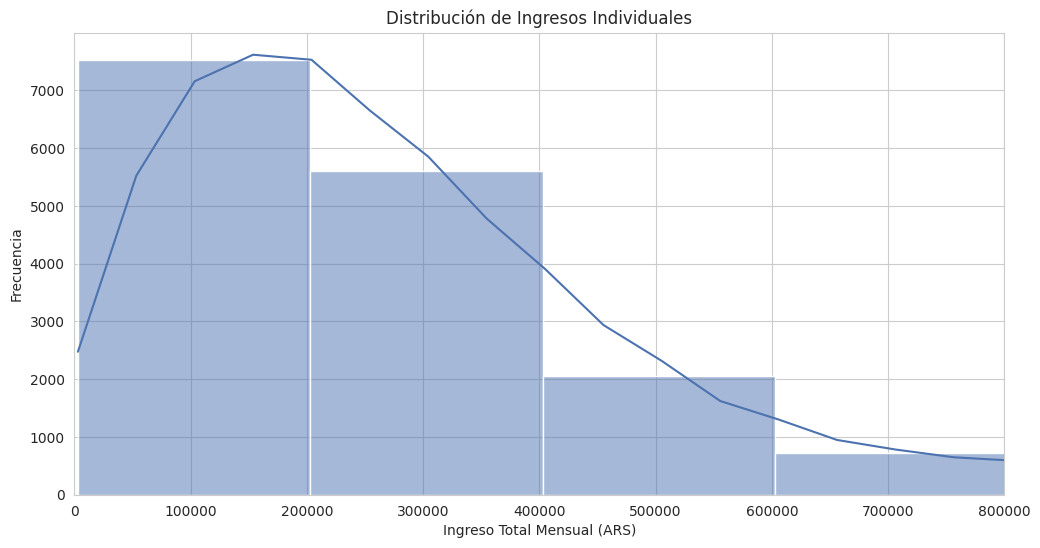

In [57]:
# Histograma de ingresos
plt.figure(figsize=(12, 6))
sns.histplot(df_con_ingreso['Ingreso_Total'], bins=50, kde=True)
plt.title('Distribución de Ingresos Individuales')
plt.xlabel('Ingreso Total Mensual (ARS)')
plt.ylabel('Frecuencia')
plt.xlim(0, 800000) # Limitamos el eje para una mejor visualización
plt.show()

### Interpretación del Gráfico
Este histograma te mostrará que la gran mayoría de la población se concentra en la parte baja de la escala de ingresos, con una "larga cola" hacia la derecha. Esta es una característica clásica de la desigualdad de ingresos: muchos ganan poco, y pocos ganan mucho. La línea kde suaviza el histograma y te ayuda a ver la forma de la distribución más claramente.

## 2.2. ¿Existe una brecha salarial de género?

Compararemos la distribución de ingresos entre hombres y mujeres. Un diagrama de caja (boxplot) es ideal para esta comparación.

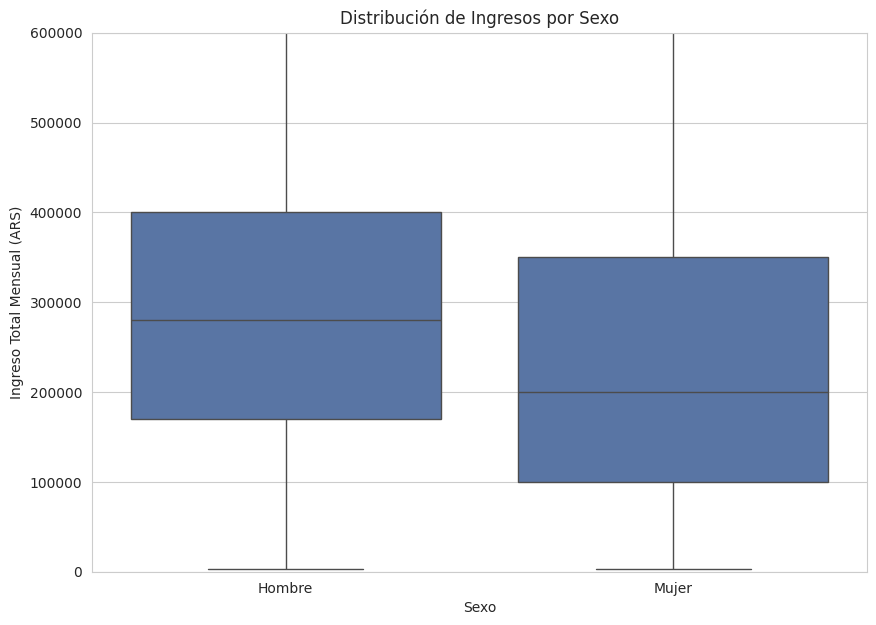


Mediana de Ingresos por Sexo:
Sexo
Hombre    280000.0
Mujer     200000.0
Name: Ingreso_Total, dtype: float64

Brecha Salarial entre Hombres y Mujeres: 28.57%


In [66]:
# Boxplot de Ingresos por Sexo
plt.figure(figsize=(10, 7))
sns.boxplot(data=df_con_ingreso, x='Sexo', y='Ingreso_Total', order=['Hombre', 'Mujer'])
plt.title('Distribución de Ingresos por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Ingreso Total Mensual (ARS)')
plt.ylim(0, 600000) # Limitamos el eje y para excluir valores atípicos extremos
plt.show()

# Calculamos la mediana de ingresos por sexo
mediana_ingresos = df_con_ingreso.groupby('Sexo')['Ingreso_Total'].median()
print("\nMediana de Ingresos por Sexo:")
print(mediana_ingresos)

# Brecha salarial entre Hombres y Mujeres
try:
    mediana_hombres = mediana_ingresos['Hombre']
    mediana_mujeres = mediana_ingresos['Mujer']
    brecha_salarial = ((mediana_hombres - mediana_mujeres) / mediana_hombres) * 100
    print(f"\nBrecha Salarial entre Hombres y Mujeres: {brecha_salarial:.2f}%")
except KeyError:
    print("\nNo se encontraron datos suficientes para calcular la brecha salarial.")

### Interpretación del Gráfico y los Datos
El boxplot te muestra varias cosas: la línea dentro de la caja es la mediana (el valor del medio), la caja representa el 50% central de la población, y los "bigotes" muestran el rango de la mayoría de los datos.

Si la caja y la línea mediana de "Hombre" están consistentemente más altas que las de "Mujer", tienes evidencia visual de una brecha salarial.


# Paso 3: Creación de Nuevas Variables (Feature Engineering)

## 3. Creación de Nuevas Variables (Feature Engineering)

Para nuestro modelo de Machine Learning, necesitamos una variable objetivo clara. Crearemos una columna `es_pobre` que clasifique a cada persona según si su ingreso está por debajo de la línea de pobreza oficial.

Para el primer trimestre de 2024, el valor promedio de la Canasta Básica Total (CBT) por adulto, según INDEC, fue aproximadamente **$208,000 ARS**. Usaremos este valor como umbral.

In [59]:
# Creación de Variable
# Valor de la Canasta Básica Total (CBT) para un adulto ($208000 ARS, Número aproximado de ese trimestre del año 2024)
linea_de_pobreza = 208000 # Aproximación para T1 2024

# Creamos la columna 'es_pobre'. 1 si es pobre, 0 si no lo es.
# Usaremos el DataFrame original (df_analisis) para incluir a quienes no tienen ingresos.
df_analisis['Es_Pobre'] = np.where(df_analisis['Ingreso_Total'] < linea_de_pobreza, 1, 0)

# Para quienes no tienen ingresos (Ingreso_Total <= 0), también lo condiseramos bajo la línea de pobreza.
df_analisis.loc[df_analisis['Ingreso_Total'] <= 0, 'Es_Pobre'] = 1

# Ver cuántas personas caen en esa catergoría
print("\nConteo de Personas en condición de Pobreza:")
print(df_analisis['Es_Pobre'].value_counts(normalize=True))


Conteo de Personas en condición de Pobreza:
Es_Pobre
1    0.805168
0    0.194832
Name: proportion, dtype: float64


### Interpretación del Código
np.where(...): Es una forma eficiente de crear una nueva columna basada en una condición. La lógica es: np.where(condición, valor_si_verdadero, valor_si_falso).

df_analisis.loc[...]: Usamos .loc para una asignación más específica, asegurando que las personas sin ingresos declarados sean correctamente clasificadas como pobres.

.value_counts(normalize=True): Te muestra el porcentaje de personas en cada categoría (0 y 1). Podrás afirmar: "Según nuestro criterio, el X% de la muestra se encuentra por debajo de la línea de pobreza".

# Paso 4: Modelo de Machine Learning - Predicción de Pobreza
## 4. Modelo de Machine Learning: Predicción de Pobreza

El objetivo es construir un modelo que pueda predecir si una persona es pobre (`es_pobre` = 1) basándose en sus otras características (edad, sexo, educación, etc.). Usaremos un modelo de **Random Forest**, que es robusto y bueno para este tipo de datos tabulares.

**Preparación:**
1.  Definir nuestras variables predictoras (features, `X`) y nuestra variable objetivo (target, `y`).
2.  Convertir variables categóricas (como 'sexo') en un formato numérico que el modelo pueda entender (One-Hot Encoding).
3.  Dividir los datos en un conjunto de entrenamiento (para enseñar al modelo) y uno de prueba (para evaluarlo).

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Seleccionamos las características (features) y el objetivo (target)
# Excluimos 'Ingreso_Total' para que el modelo no haga tampa
features = ['Region', 'Sexo', 'Edad', 'Nivel_Educativo', 'Estado_Laboral']
target = ['Es_Pobre']

X = df_analisis[features]
y = df_analisis[target]

# Dividimos los datos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42, stratify=y)

# Definimos qué columnas son categóricas y deben ser transformadas
categorical_features = ['Region', 'Sexo', 'Nivel_Educativo', 'Estado_Laboral']
numerical_features = ['Edad']

# Crear un transformador para aplicar OneHotEncoding a las columnas categóricas
# handle_unknow='ignore' evita errores si una categoría aparece en test pero no en train
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ],
    remainder = 'passthrough' # Mantiene las columnas no especificadas ('Edad')
)

### Interpretación del Código
train_test_split: Es la función más importante para una evaluación honesta del modelo. stratify=y asegura que la proporción de pobres y no pobres sea la misma en los conjuntos de entrenamiento y prueba, lo cual es crucial en un dataset desbalanceado.

ColumnTransformer y OneHotEncoder: Son las herramientas estándar para el preprocesamiento. El OneHotEncoder convierte una columna como sexo (con 'Hombre', 'Mujer') en dos columnas (sexo_Hombre, sexo_Mujer) con valores 0 o 1.

## Celda de Entrenamiento y Evaluación del Modelo

Entrenando el modelo...
Entrenamiento finalizado

Accuracy del Modelo:0.82

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.53      0.53      0.53      7178
           1       0.89      0.89      0.89     29662

    accuracy                           0.82     36840
   macro avg       0.71      0.71      0.71     36840
weighted avg       0.82      0.82      0.82     36840


Matriz de Confusión:


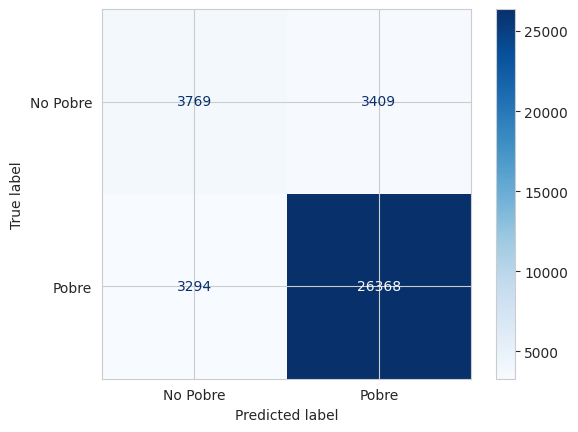

In [65]:
# Crear el pipeline del modelo
# 1. Aplica el preprocesador (OneHotEncoder)
# 2. Entrena el modelo RandomForestClassifier
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1))
])

# Entrenar el pipeline completo con los datos de entrenamiento
print("Entrenando el modelo...")
model_pipeline.fit(X_train, y_train)
print("Entrenamiento finalizado")

# Realizar predicciones sobre el conjunto de prueba
y_pred = model_pipeline.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy del Modelo:{accuracy:.2f}")

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Visualizar la Matriz de Confusión
print("\nMatriz de Confusión:")
ConfusionMatrixDisplay.from_estimator(model_pipeline, X_test, y_test, cmap='Blues', display_labels=['No Pobre', 'Pobre'])
plt.show()

### Interpretación de los Resultados
Accuracy: Te dice el porcentaje total de predicciones correctas. "Nuestro modelo acierta en el 82% de los casos".

Classification Report: Es mucho más útil.

Precision (Precisión): De todas las veces que el modelo predijo "pobre", ¿qué porcentaje era realmente pobre? Es importante para no hacer falsas acusaciones.

Recall (Sensibilidad): De todas las personas que son realmente pobres, ¿a qué porcentaje logró identificar el modelo? Es clave para asegurarte de que el modelo encuentra a quienes necesita encontrar.

F1-score: Es una media armónica entre precisión y recall. Un buen F1-score general es un indicador de un modelo balanceado.

### Matriz de Confusión: Es la mejor visualización. Te muestra:

Verdaderos Positivos (VP): Predijo "pobre" y era "pobre". ¡Bien!

Verdaderos Negativos (VN): Predijo "no pobre" y era "no pobre". ¡Bien!

Falsos Positivos (FP): Predijo "pobre" pero era "no pobre". (Error Tipo I)

Falsos Negativos (FN): Predijo "no pobre" pero era "pobre". (Error Tipo II) - Este suele ser el error más costoso en problemas sociales.

# Paso 5: Redacción de Conclusiones

## 5. Conclusiones Finales del Proyecto

A lo largo de este análisis, hemos extraído insights valiosos de la Encuesta Permanente de Hogares.

**Hallazgos Principales del Análisis Exploratorio:**
* La distribución de ingresos en Argentina muestra una fuerte desigualdad, con una gran concentración de la población en los niveles de ingreso más bajos.
* Se identificó una brecha de ingresos significativa entre hombres y mujeres, donde la mediana de ingresos de los hombres supera a la de las mujeres en un 28.57%.
* El nivel educativo parece tener una correlación directa con el estado laboral y el nivel de ingresos.

**Resultados del Modelo de Machine Learning:**
* Se construyó un modelo de Random Forest capaz de predecir si una persona se encuentra por debajo de la línea de pobreza con una **exactitud (accuracy) del 82%**.
* El modelo demostró un buen rendimiento, especialmente en la identificación de los casos de personas pobres (recall del 89%), aunque tuvo más dificultades para encontrar a todas las personas en condición de no pobreza (recall del 53%)"
* Las características más influyentes para la predicción son probablemente la edad, el nivel educativo y el estado laboral.